In [1]:
import numpy as np
from ixdat import Measurement
from ixdat.techniques.ms import MSInlet, MSCalResult, MSMeasurement, MSCalibration
from ixdat.techniques.ec_ms import ECMSCalibration
from ixdat.readers.ec_ms_pkl import measurement_from_ec_ms_dataset

#from ixdat.constants import FARADAY_CONSTANT

from EC_MS import download_cinfdata_set, plot_signal, plot_flux
from EC_MS import Chip, chip_calibration, point_calibration, recalibrate
from EC_MS import load_calibration_results, save_calibration_results

import sys

#from cinf_database.cinfdata import Cinfdata
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec


fig_width_pt = 330.0 #246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

importing ixdat v0.2.3dev1 from C:\Users\filro\Anaconda3\lib\site-packages\ixdat\__init__.py

----------  Importing EC_MS v0.7.5 ----------
from C:\Users\filro\Anaconda3\lib\site-packages\EC_MS\__init__.py


wasnt able to evaluate '====='
wasnt able to evaluate '====='
wasnt able to evaluate '====='


In [2]:
chip = MSInlet() # chip standard dimensions are sniffer chip dimensions

In [3]:
print('CO2 molar flow (calculated) =',chip.calc_n_dot_0(gas='CO2'),'mol/s')
print('Ar molar flow (calculated) =',chip.calc_n_dot_0(gas='Ar'),'mol/s')
print('H2 molar flow (calculated) =',chip.calc_n_dot_0(gas='H2'),'mol/s')
print('O2 molar flow (calculated) =',chip.calc_n_dot_0(gas='O2'),'mol/s')
print('CO molar flow (calculated) =',chip.calc_n_dot_0(gas='CO'),'mol/s')


CO2 molar flow (calculated) = 7.9710805062947e-09 mol/s
Ar molar flow (calculated) = 5.637935262089964e-09 mol/s
H2 molar flow (calculated) = 1.6404864835447366e-08 mol/s
O2 molar flow (calculated) = 6.242189058369519e-09 mol/s
CO molar flow (calculated) = 7.159088818719983e-09 mol/s


In [4]:
# Remember to replace the n_dot_measured with the values above
print('CO2 capillary length (calculated) =',chip.calc_l_cap_eff(gas='CO2', n_dot_measured=7.97e-9, w_cap=None, h_cap=None, T=None, p=None),'m')
print('Ar capillary length (calculated) =',chip.calc_l_cap_eff(gas='Ar', n_dot_measured=5.64e-9, w_cap=None, h_cap=None, T=None, p=None),'m')
print('H2 capillary length (calculated) =',chip.calc_l_cap_eff(gas='H2', n_dot_measured=1.64e-8, w_cap=None, h_cap=None, T=None, p=None),'m')
print('O2 capillary length (calculated) =',chip.calc_l_cap_eff(gas='O2', n_dot_measured=6.24e-9, w_cap=None, h_cap=None, T=None, p=None),'m')
print('CO capillary length (calculated) =',chip.calc_l_cap_eff(gas='CO', n_dot_measured=7.15e-9, w_cap=None, h_cap=None, T=None, p=None),'m') 

CO2 capillary length (calculated) = 0.00100013557168064 m
Ar capillary length (calculated) = 0.0009996339117180786 m
H2 capillary length (calculated) = 0.0010002966363077662 m
O2 capillary length (calculated) = 0.0010003508106361408 m
CO capillary length (calculated) = 0.0010012711634573403 m


In [5]:
#Here we start with the new calculations
l_cap = 1.5e-3  # dimensions of capillary in cm
w_cap = 5e-6
h_cap = 3e-6


chip2 = MSInlet(l_cap=l_cap, w_cap = w_cap, h_cap=h_cap)

print('CO2 molar flow (calculated with standard dimensions) =',chip2.calc_n_dot_0(gas='CO2'),'mol/s')
print('Ar molar flow (calculated with standard dimensions) =',chip2.calc_n_dot_0(gas='Ar'),'mol/s')
print('H2 molar flow (calculated with standard dimensions) =',chip2.calc_n_dot_0(gas='H2'),'mol/s')
print('O2 molar flow (calculated with standard dimensions) =',chip2.calc_n_dot_0(gas='O2'),'mol/s')
print('CO molar flow (calculated with standard dimensions) =',chip2.calc_n_dot_0(gas='CO'),'mol/s')


# flux of Microreactor dimensions in moles per second

CO2 molar flow (calculated with standard dimensions) = 9.868211210750008e-10 mol/s
Ar molar flow (calculated with standard dimensions) = 7.201880699952731e-10 mol/s
H2 molar flow (calculated with standard dimensions) = 2.202530636545096e-09 mol/s
O2 molar flow (calculated with standard dimensions) = 7.980750274991814e-10 mol/s
CO molar flow (calculated with standard dimensions) = 9.093092266791742e-10 mol/s


In [6]:
# Remember to replace the n_dot_measured with the values above
print('CO2 capillary length (calculated with the standard flow) =',chip2.calc_l_cap_eff(gas='CO2', w_cap=None, h_cap=None, n_dot_measured=9.87e-10, T=None, p=None),'m')
print('Ar capillary length (calculated with the standard flow) =',chip2.calc_l_cap_eff(gas='Ar', w_cap=None, h_cap=None, n_dot_measured=7.20e-10, T=None, p=None),'m')
print('H2 capillary length (calculated with the standard flow) =',chip2.calc_l_cap_eff(gas='H2', w_cap=None, h_cap=None, n_dot_measured=2.20e-9, T=None, p=None),'m')
print('O2 capillary length (calculated with the standard flow) =',chip2.calc_l_cap_eff(gas='O2', w_cap=None, h_cap=None, n_dot_measured=7.98e-10, T=None, p=None),'m')
print('CO capillary length (calculated with the standard flow) =',chip2.calc_l_cap_eff(gas='CO', w_cap=None, h_cap=None, n_dot_measured=9.09e-10, T=None, p=None),'m')


# dimensions of Microreactor dimensions with calculctaed flux from before

CO2 capillary length (calculated with the standard flow) = 0.0014997281475303964 m
Ar capillary length (calculated with the standard flow) = 0.0015003918124901524 m
H2 capillary length (calculated with the standard flow) = 0.00150172543400802 m
O2 capillary length (calculated with the standard flow) = 0.0015001410291337997 m
CO capillary length (calculated with the standard flow) = 0.0015005102750481423 m


In [7]:
# load baratron data for chip calibration of MR68 Au# 

CINFDATA: Using pymysql as the database module
CINFDATA: pymysql is known to be broken with Python 3. Consider installing mysqlclient!
CINFDATA: Using direct db connection: cinfdata:3306
CINFDATA: Using direct db connection: cinfdata:3306




function 'synchronize' at your service!
append is True
file_number_type = MS
---------- syncrhonize entering first loop -----------
working on 2022-11-27 15:25:48
	tstamp is 1669559148 seconds since Epoch
--- done with first loop.


first: 1669559148, last: 1669559148
, intersection start: 1669559148.0128987, intersection finish: 1669570653.8697147
, union start: 1669559148.0128987, union finish: 1669570653.8697147
First loop indicates that only one dataset has data! Synchronize will just return that dataset!

function 'synchronize' finished!




CINFDATA: Using direct db connection: cinfdata:3306




function 'synchronize' at your service!
append is True
file_number_type = MS
---------- syncrhonize entering first loop -----------
working on 2022-12-03 16:13:24
	tstamp is 1670080404 seconds since Epoch
--- done with first loop.


first: 1670080404, last: 1670080404
, intersection start: 1670080404.0139408, intersection finish: 1670107521.1830623
, union start: 1670080404.0139408, union finish: 1670107521.1830623
First loop indicates that only one dataset has data! Synchronize will just return that dataset!

function 'synchronize' finished!




function 'synchronize' at your service!
append is True
file_number_type = MS
---------- syncrhonize entering first loop -----------
working on 2022-12-09 11:32:37
	tstamp is 1670581957 seconds since Epoch
--- done with first loop.


first: 1670581957, last: 1670581957
, intersection start: 1670581957.014411, intersection finish: 1670585791.6717427
, union start: 1670581957.014411, union finish: 1670585791.6717427
First loop indicates that on

<AxesSubplot:xlabel='time / [s]', ylabel='MS signal / [nA]'>

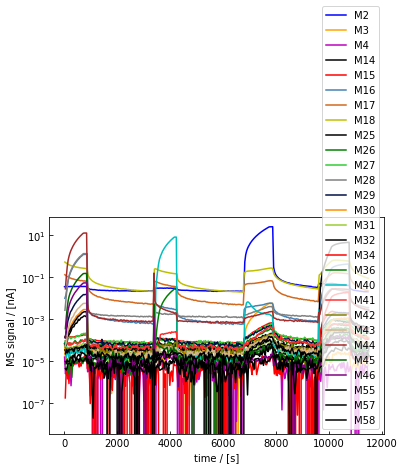

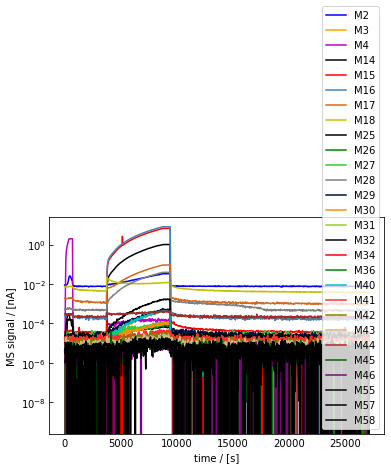

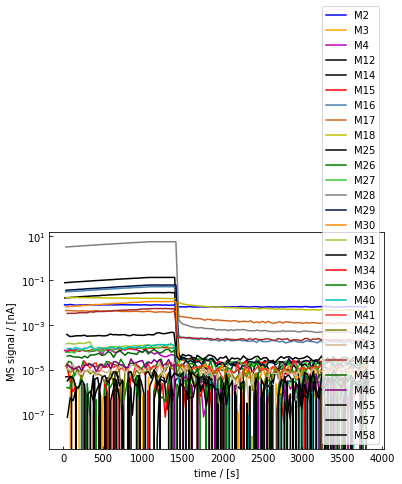

In [8]:
data1 = download_cinfdata_set(setup='microreactorNG', time='2022-11-27 15:25:48') #CO2 Ar H2 O2

data2 = download_cinfdata_set(setup='microreactorNG', time='2022-12-03 16:13:24') #He CH4

data3 = download_cinfdata_set(setup='microreactorNG', time='2022-12-09 11:32:37') #CO

plot_signal(data1, leg=True)
plot_signal(data2, leg=True)
plot_signal(data3, leg=True)

In [9]:
meas_baratron_1 = measurement_from_ec_ms_dataset(
    data1, 
    cls=MSMeasurement,
    technique="MS"
)

meas_baratron_2 = measurement_from_ec_ms_dataset(
    data2, 
    cls=MSMeasurement,
    technique="MS"
)

meas_baratron_3 = measurement_from_ec_ms_dataset(
    data3, 
    cls=MSMeasurement,
    technique="MS"
)

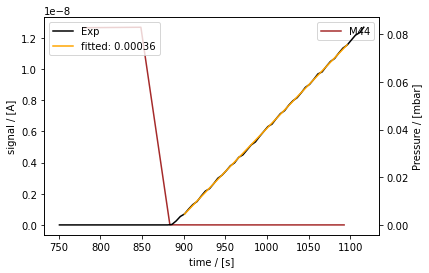

In [10]:
# CO2
meas = meas_baratron_1

tstart = 900
tend = 1100
GAS = 'M44'
t, S = meas.grab('Baratron pressure', tspan=[tstart,tend])


fig, ax = plt.subplots()

m, b = np.polyfit(t, S, 1)
m_co2 = m
S_fitted = m*t+b


axes = meas.plot(mass_lists=[[GAS],['Baratron pressure'],], tspan=[tstart-150,tend+20], ax=ax, logplot=False) 
#ax.plot(t, S, linestyle='dotted', color='blue')
axes[1].plot(t, S_fitted, color='orange')

axes[1].legend(['Exp','fitted: {0:.5f}'.format(m)])
axes[1].set_ylabel('Pressure / [mbar]')

plt.show()



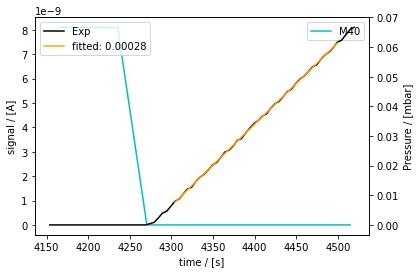

In [11]:
# Ar

meas = meas_baratron_1

tstart = 4300
tend = 4500
GAS = 'M40'
t, S = meas.grab('Baratron pressure', tspan=[tstart,tend])


fig, ax = plt.subplots()

m, b = np.polyfit(t, S, 1)
m_ar = m
S_fitted = m*t+b


axes = meas.plot(mass_lists=[[GAS],['Baratron pressure'],], tspan=[tstart-150,tend+20], ax=ax, logplot=False) 
#ax.plot(t, S, linestyle='dotted', color='blue')
axes[1].plot(t, S_fitted, color='orange')

axes[1].legend(['Exp','fitted: {0:.5f}'.format(m)])
axes[1].set_ylabel('Pressure / [mbar]')

plt.show()

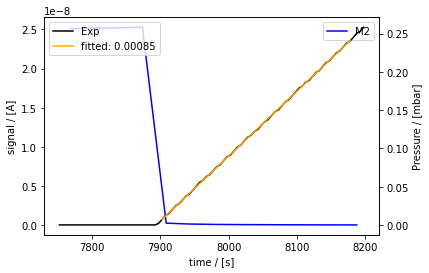

In [12]:
# H2

meas = meas_baratron_1

tstart = 7900
tend = 8180
GAS = 'M2'
t, S = meas.grab('Baratron pressure', tspan=[tstart,tend])


fig, ax = plt.subplots()

m, b = np.polyfit(t, S, 1)
m_h2 = m
S_fitted = m*t+b


axes = meas.plot(mass_lists=[[GAS],['Baratron pressure'],], tspan=[tstart-150,tend+20], ax=ax, logplot=False) 
#ax.plot(t, S, linestyle='dotted', color='blue')
axes[1].plot(t, S_fitted, color='orange')

axes[1].legend(['Exp','fitted: {0:.5f}'.format(m)])
axes[1].set_ylabel('Pressure / [mbar]')

plt.show()

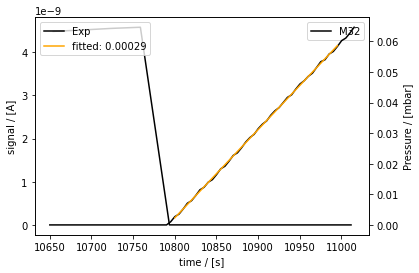

In [13]:
# O2

meas = meas_baratron_1

tstart = 10800
tend = 11000
GAS = 'M32'
t, S = meas.grab('Baratron pressure', tspan=[tstart,tend])


fig, ax = plt.subplots()

m, b = np.polyfit(t, S, 1)
m_o2 = m
S_fitted = m*t+b


axes = meas.plot(mass_lists=[[GAS],['Baratron pressure'],], tspan=[tstart-150,tend+20], ax=ax, logplot=False) 
#ax.plot(t, S, linestyle='dotted', color='blue')
axes[1].plot(t, S_fitted, color='orange')

axes[1].legend(['Exp','fitted: {0:.5f}'.format(m)])
axes[1].set_ylabel('Pressure / [mbar]')

plt.show()

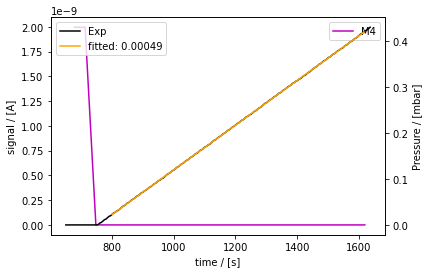

In [14]:
# He

meas = meas_baratron_2

tstart = 800
tend = 1620
GAS = 'M4'
t, S = meas.grab('Baratron pressure', tspan=[tstart,tend])


fig, ax = plt.subplots()

m, b = np.polyfit(t, S, 1)
m_He = m
S_fitted = m*t+b


axes = meas.plot(mass_lists=[[GAS],['Baratron pressure'],], tspan=[tstart-150,tend+20], ax=ax, logplot=False) 
#ax.plot(t, S, linestyle='dotted', color='blue')
axes[1].plot(t, S_fitted, color='orange')

axes[1].legend(['Exp','fitted: {0:.5f}'.format(m)])
axes[1].set_ylabel('Pressure / [mbar]')

plt.show()

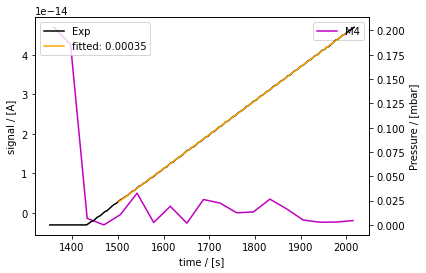

In [15]:
# CO

meas = meas_baratron_3

tstart = 1500
tend = 2000
GAS = 'M4'
t, S = meas.grab('Baratron pressure', tspan=[tstart,tend])


fig, ax = plt.subplots()

m, b = np.polyfit(t, S, 1)
m_CO = m
S_fitted = m*t+b


axes = meas.plot(mass_lists=[[GAS],['Baratron pressure'],], tspan=[tstart-150,tend+20], ax=ax, logplot=False) 
#ax.plot(t, S, linestyle='dotted', color='blue')
axes[1].plot(t, S_fitted, color='orange')

axes[1].legend(['Exp','fitted: {0:.5f}'.format(m)])
axes[1].set_ylabel('Pressure / [mbar]')

plt.show()

In [16]:
#(m2*26/(m1-m2))                                                                       
def meas_n_dot(m):
    V_ext = 0#26
    V = (35 + V_ext) *1e-3            # mL                                                                     
    p = m *1e-3         # mbar/s                                                                         
    R = 0.08314       # L bar / K mol                                                                          
    T = 273           # K                                                                         
    kb = 1.38e-23     # J K-1                                                                        
    Av = 6.022e23     # 1/mol

    n = (p * V) / (R * T)                                                                    
    N = (p*1e5 * V * 1e-3) / (kb * T)                                                                     
    n_av = N/Av                                                                                
                                                                                            
    return n                                                                                         
#print('molecules/s: ', N)                                                                  
#print('mol/s: ', n, n_av)                                                                  
#print('nmol/s: ', n*1e9, n_av*1e9)  

In [22]:
masses = {}

masses['CO2'] = {'calc':chip2.calc_n_dot_0(gas='CO2'),'meas':meas_n_dot(m_co2)}
masses['Ar']  = {'calc':chip2.calc_n_dot_0(gas='Ar'),'meas':meas_n_dot(m_ar)}
masses['H2']  = {'calc':chip2.calc_n_dot_0(gas='H2'),'meas':meas_n_dot(m_h2)}
masses['O2']  = {'calc':chip2.calc_n_dot_0(gas='O2'),'meas':meas_n_dot(m_o2)}
masses['He']  = {'calc':chip2.calc_n_dot_0(gas='He'),'meas':meas_n_dot(m_He)}
masses['CO']  = {'calc':chip2.calc_n_dot_0(gas='CO'),'meas':meas_n_dot(m_CO)}

In [23]:
print('CO2 standard molar flow (calc before) =',chip2.calc_n_dot_0(gas='CO2'),'mol/s','--', 'CO2 molar flow (baratron) =',meas_n_dot(m_co2),'mol/s')
print('Ar standard molar flow (calc before) =',chip2.calc_n_dot_0(gas='Ar'),'mol/s','--', 'Ar molar flow (baratron) =',meas_n_dot(m_ar),'mol/s')
print('H2 standard molar flow (calc before) =',chip2.calc_n_dot_0(gas='H2'),'mol/s','--', 'H2 molar flow (baratron) =',meas_n_dot(m_h2),'mol/s')
print('O2 standard molar flow (calc before) =',chip2.calc_n_dot_0(gas='O2'),'mol/s','--', 'O2 molar flow (baratron) =',meas_n_dot(m_o2),'mol/s')
print('He standard molar flow (calc before) =',chip2.calc_n_dot_0(gas='He'),'mol/s','--', 'He molar flow (baratron) =',meas_n_dot(m_He),'mol/s')
print('CO standard molar flow (calc before) =',chip2.calc_n_dot_0(gas='CO'),'mol/s','--', 'CO molar flow (baratron) =',meas_n_dot(m_CO),'mol/s')

CO2 standard molar flow (calc before) = 9.868211210750008e-10 mol/s -- CO2 molar flow (baratron) = 5.606505193809174e-10 mol/s
Ar standard molar flow (calc before) = 7.201880699952731e-10 mol/s -- Ar molar flow (baratron) = 4.2418175032276594e-10 mol/s
H2 standard molar flow (calc before) = 2.202530636545096e-09 mol/s -- H2 molar flow (baratron) = 1.3085729213365768e-09 mol/s
O2 standard molar flow (calc before) = 7.980750274991814e-10 mol/s -- O2 molar flow (baratron) = 4.444812126657464e-10 mol/s
He standard molar flow (calc before) = 1.2145344823649857e-09 mol/s -- He molar flow (baratron) = 7.507675518593551e-10 mol/s
CO standard molar flow (calc before) = 9.093092266791742e-10 mol/s -- CO molar flow (baratron) = 5.385695760896054e-10 mol/s


In [24]:
print('CO2 effective length (calc from the baratron flow) =',chip2.calc_l_cap_eff(gas='CO2', n_dot_measured=meas_n_dot(m_co2)),'m')
print('Ar effective length (calc from the baratron flow) =',chip2.calc_l_cap_eff(gas='Ar', n_dot_measured=meas_n_dot(m_ar)),'m')
print('H2 effective length (calc from the baratron flow) =',chip2.calc_l_cap_eff(gas='H2', n_dot_measured=meas_n_dot(m_h2)),'m')
print('O2 effective length (calc from the baratron flow) =',chip2.calc_l_cap_eff(gas='O2', n_dot_measured=meas_n_dot(m_o2)),'m')
print('He effective length (calc from the baratron flow) =',chip2.calc_l_cap_eff(gas='He', n_dot_measured=meas_n_dot(m_He)),'m')
print('CO effective length (calc from the baratron flow) =',chip2.calc_l_cap_eff(gas='CO', n_dot_measured=meas_n_dot(m_CO)),'m')

CO2 effective length (calc from the baratron flow) = 0.0026402038889520793 m
Ar effective length (calc from the baratron flow) = 0.0025467434753402465 m
H2 effective length (calc from the baratron flow) = 0.0025247320198580493 m
O2 effective length (calc from the baratron flow) = 0.002693280406767183 m
He effective length (calc from the baratron flow) = 0.0024265855910202755 m
CO effective length (calc from the baratron flow) = 0.002532567565219892 m


In [25]:
print('Old capillary length =', chip2.l_cap , 'm')

Old capillary length = 0.0015 m


In [26]:
#np.mean(list(chip2.l_cap_eff.values()))
d = {}

In [27]:
chip2.update_l_cap()

0.0025606854911929544

In [28]:
print('New capillary length =',chip2.l_cap , 'm')

New capillary length = 0.0025606854911929544 m


In [29]:
print('CO2 molar flow (calc with the new l) =', chip2.calc_n_dot_0(gas='CO2'),'mol/s', '--', 'CO2 molar flow (baratron) =', meas_n_dot(m_co2),'mol/s')
print('Ar molar flow (calc with the new l) =',chip2.calc_n_dot_0(gas='Ar'),'mol/s','--', 'Ar molar flow (baratron) =', meas_n_dot(m_ar),'mol/s')
print('H2 molar flow (calc with the new l) =',chip2.calc_n_dot_0(gas='H2'),'mol/s','--', 'H2 molar flow (baratron) =', meas_n_dot(m_h2),'mol/s')
print('O2 molar flow (calc with the new l) =',chip2.calc_n_dot_0(gas='O2'),'mol/s','--', 'O2 molar flow (baratron) =', meas_n_dot(m_o2),'mol/s')
print('He molar flow (calc with the new l) =',chip2.calc_n_dot_0(gas='He'),'mol/s','--', 'He molar flow (baratron) =', meas_n_dot(m_He),'mol/s')
print('CO molar flow (calc with the new l) =',chip2.calc_n_dot_0(gas='CO'),'mol/s','--', 'CO molar flow (baratron) =', meas_n_dot(m_CO),'mol/s')

CO2 molar flow (calc with the new l) = 5.780607133142702e-10 mol/s -- CO2 molar flow (baratron) = 5.606505193809174e-10 mol/s
Ar molar flow (calc with the new l) = 4.2187223253631026e-10 mol/s -- Ar molar flow (baratron) = 4.2418175032276594e-10 mol/s
H2 molar flow (calc with the new l) = 1.2901998180489142e-09 mol/s -- H2 molar flow (baratron) = 1.3085729213365768e-09 mol/s
O2 molar flow (calc with the new l) = 4.674969047803952e-10 mol/s -- O2 molar flow (baratron) = 4.444812126657464e-10 mol/s
He molar flow (calc with the new l) = 7.114507930838279e-10 mol/s -- He molar flow (baratron) = 7.507675518593551e-10 mol/s
CO molar flow (calc with the new l) = 5.326557457797471e-10 mol/s -- CO molar flow (baratron) = 5.385695760896054e-10 mol/s


In [30]:
MRFR7_Ni5Ga3 = chip2

# Chip calibration done #

In [31]:
# Mass spec calibration begin #

In [32]:
# Some mass spec calibration data are in seperate experiments / mass spec data 
# than the one from the baratron measurement

''' data_cal = download_cinfdata_set(setup='microreactorNG', time='2022-11-15 13:45:14')
meas_baratron_1 = measurement_from_ec_ms_dataset(
    data1, 
    cls=MSMeasurement,
    technique="MS"
) '''

' data_cal = download_cinfdata_set(setup=\'microreactorNG\', time=\'2022-11-15 13:45:14\')\nmeas_baratron_1 = measurement_from_ec_ms_dataset(\n    data1, \n    cls=MSMeasurement,\n    technique="MS"\n) '

In [34]:
print('length of capillary of chip ', MRFR7_Ni5Ga3.l_cap, '\n')

#NAMING SCHEME
#cal_result_'GAS' = 'Calibration CHIP name'.gas_flux_calibration(
#                           measurement = 'Measurement with steady state at fixed 1 bar pressure (or the pressure used with the baratron calibration)', 
#                           mol='GAS',
#                           mass='M32', # mass the gas is measured at
#                           tspan=[31000,31200], time span
#                           tspan_bg=[12000, 15000], backgroun time span
#                           )

meas = meas_baratron_1

cal_result_CO2 = MRFR7_Ni5Ga3.gas_flux_calibration(
                           measurement = meas_baratron_1, 
                           mol='CO2',
                           mass='M44',
                           tspan=[720, 828],
                           tspan_bg=[2160, 2880],
                           )

cal_result_Ar = MRFR7_Ni5Ga3.gas_flux_calibration(
                           measurement = meas_baratron_1, 
                           mol='Ar',
                           mass='M40',
                           tspan=[4176,4212],
                           tspan_bg=[2160, 2880],
                           )

cal_result_H2 = MRFR7_Ni5Ga3.gas_flux_calibration(
                           measurement = meas_baratron_1, 
                           mol='H2',
                           mass='M2',
                           tspan=[7740, 7848],
                           tspan_bg=[2160, 2880],
                           )


cal_result_O2 = MRFR7_Ni5Ga3.gas_flux_calibration(
                           measurement = meas_baratron_1, 
                           mol='O2',
                           mass='M32',
                           tspan=[10440, 10728],
                           tspan_bg=[2160, 2880],
                           )

cal_result_He = MRFR7_Ni5Ga3.gas_flux_calibration(
                           measurement = meas_baratron_2, 
                           mol='He',
                           mass='M4',
                           tspan=[432, 684],
                           tspan_bg=[1440, 2880],
                           )

cal_result_CO = MRFR7_Ni5Ga3.gas_flux_calibration(
                           measurement = meas_baratron_3, 
                           mol='CO',
                           mass='M28',
                           tspan=[1116, 1368],
                           tspan_bg=[3240, 3600],
                           )


print(cal_result_CO2, '\n',
      cal_result_Ar, '\n',
      cal_result_O2, '\n',
      cal_result_H2, '\n',
      cal_result_He, '\n',
      cal_result_CO)

cal_results = [cal_result_CO2, cal_result_Ar, cal_result_O2, cal_result_H2, cal_result_He, cal_result_CO]

calibration = MSCalibration(name="MRFR7_Ni5Ga3", 
                            date="22H24",
                            setup='MicroreactorNG',
                            ms_cal_results=cal_results,
                           )


# Export calibration to somewhere to be loaded in another script 
# in principle this calibration can be used until changes in the mass spec is done
calibration.export()

#
print('\n')
print(calibration.mol_list)
print('\n')
print(calibration.ms_cal_results)



length of capillary of chip  0.0025606854911929544 

MSCalResult(name=CO2@M44, mol=CO2, mass=M44, F=21.87396950009256) 
 MSCalResult(name=Ar@M40, mol=Ar, mass=M40, F=19.17650687896789) 
 MSCalResult(name=O2@M32, mol=O2, mass=M32, F=9.374817995711348) 
 MSCalResult(name=H2@M2, mol=H2, mass=M2, F=19.479913093290005) 
 MSCalResult(name=He@M4, mol=He, mass=M4, F=2.801334420482185) 
 MSCalResult(name=CO@M28, mol=CO, mass=M28, F=10.302646587019963)


['CO2', 'H2', 'Ar', 'He', 'O2', 'CO']


[MSCalResult(name=CO2@M44, mol=CO2, mass=M44, F=21.87396950009256), MSCalResult(name=Ar@M40, mol=Ar, mass=M40, F=19.17650687896789), MSCalResult(name=O2@M32, mol=O2, mass=M32, F=9.374817995711348), MSCalResult(name=H2@M2, mol=H2, mass=M2, F=19.479913093290005), MSCalResult(name=He@M4, mol=He, mass=M4, F=2.801334420482185), MSCalResult(name=CO@M28, mol=CO, mass=M28, F=10.302646587019963)]


In [29]:
# Calibration of mass spec done #


In [30]:
#Measurement to use the calibration on

In [31]:
data = download_cinfdata_set(setup='microreactorNG', time='2022-11-15 13:45:14')

meas_MRFR7_Ni5Ga3 = measurement_from_ec_ms_dataset(
    data, 
    cls=MSMeasurement,
    technique="MS"
)

CINFDATA: Using direct db connection: cinfdata:3306




function 'synchronize' at your service!
append is True
file_number_type = MS
---------- syncrhonize entering first loop -----------
working on 2022-11-15 13:45:14
	tstamp is 1668516314 seconds since Epoch
--- done with first loop.


first: 1668516314, last: 1668516314
, intersection start: 1668516314.01282, intersection finish: 1668678131.4805164
, union start: 1668516314.01282, union finish: 1668678131.4805164
First loop indicates that only one dataset has data! Synchronize will just return that dataset!

function 'synchronize' finished!




In [32]:
calibration = MSCalibration.read('MRFR7_Ni5Ga3.ix')

In [33]:
calibration.ms_cal_results

[MSCalResult(name=CO2@M44, mol=CO2, mass=M44, F=20.479865182912082),
 MSCalResult(name=Ar@M40, mol=Ar, mass=M40, F=17.954321256541327),
 MSCalResult(name=O2@M32, mol=O2, mass=M32, F=4.885535596311116),
 MSCalResult(name=H2@M2, mol=H2, mass=M2, F=18.23839033531317),
 MSCalResult(name=He@M4, mol=He, mass=M4, F=2.6227956139137683),
 MSCalResult(name=CO@M16, mol=CO, mass=M16, F=0.2933445598348082)]

In [34]:
meas_MRFR7_Ni5Ga3.add_calibration(calibration)

<AxesSubplot:xlabel='time / [s]', ylabel='signal / [A]'>

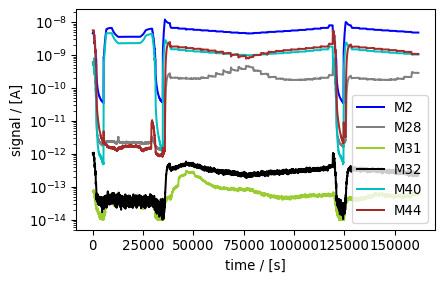

In [35]:
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(fig_size[0],fig_size[1]), dpi=96)

meas_MRFR7_Ni5Ga3.plot_measurement(mass_list=['M2','M28','M31','M32','M40','M44'], ax=ax)#, unit='pA', remove_background=True)


<AxesSubplot:xlabel='time / [s]', ylabel='signal / [pmol/s]'>

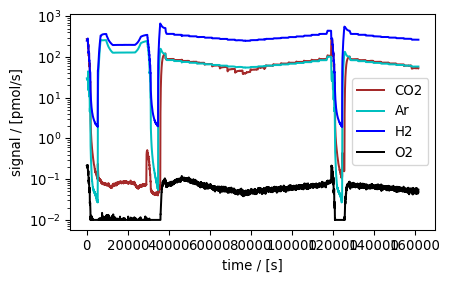

In [36]:
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(fig_size[0],fig_size[1]), dpi=96)

meas_MRFR7_Ni5Ga3.plot_measurement(mol_list=['CO2','Ar','H2','O2'], ax=ax, unit = 'pmol/s', remove_background=True)

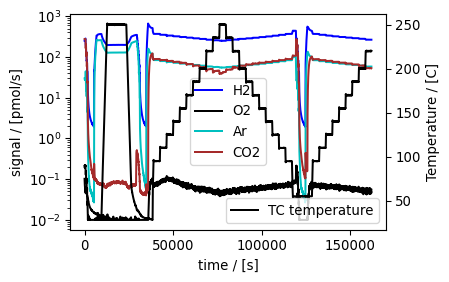

In [37]:
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(fig_size[0],fig_size[1]), dpi=96)
ax2 = ax.twinx()

ax = meas_MRFR7_Ni5Ga3.plot_measurement(mol_list=['H2','O2','Ar','CO2'], ax=ax, unit = 'pmol/s', remove_background=True)

ax2 = meas_MRFR7_Ni5Ga3.plot_measurement(mass_list=['TC temperature'], logplot=False, ax=ax2)

ax2.set_ylabel('Temperature / [C]')
plt.show()

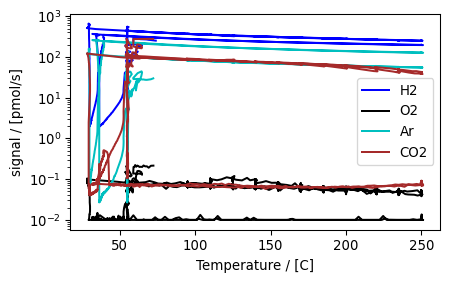

In [38]:
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(fig_size[0],fig_size[1]), dpi=96)

first_run = meas_MRFR7_Ni5Ga3.cut(tspan=[20000,120000])

ax = meas_MRFR7_Ni5Ga3.plotter.plot_vs(x_name='TC temperature', mol_list=['H2','O2','Ar','CO2'], ax=ax, unit = 'pmol/s', remove_background=True)


ax.set_xlabel('Temperature / [C]')
plt.show()

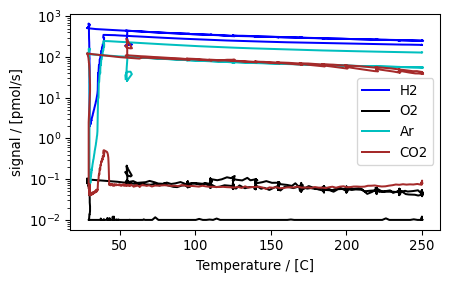

In [39]:
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(fig_size[0],fig_size[1]), dpi=96)

#first_run = meas_MRFR4_Ni5Ga3.cut(tspan=[20000,120000])

ax = meas_MRFR7_Ni5Ga3.cut(tspan=[20000,120000]).plotter.plot_vs(x_name='TC temperature', mol_list=['H2','O2','Ar','CO2'], ax=ax, unit = 'pmol/s', remove_background=True)


ax.set_xlabel('Temperature / [C]')
plt.show()

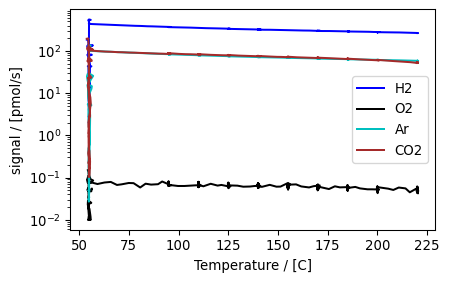

In [40]:
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(fig_size[0],fig_size[1]), dpi=96)

#second_run = meas_MRFR4_Ni5Ga3.cut(tspan=[120000,300000])

ax = meas_MRFR7_Ni5Ga3.cut(tspan=[120000,300000]).plotter.plot_vs(x_name='TC temperature', mol_list=['H2','O2','Ar','CO2'], ax=ax, unit = 'pmol/s', remove_background=True)


ax.set_xlabel('Temperature / [C]')
plt.show()